In [1]:
#Imports 
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import numpy as np
import pandas as pd

----

# Elementos Matplotlib 

Ref: https://www.kaggle.com/python10pm/matplotlib-learn-40-plots-step-by-step/data

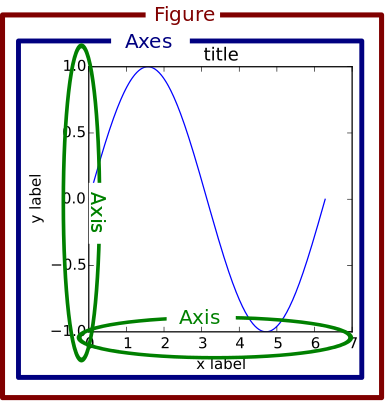

In [2]:
PATH = "Imagenes/FIguresAxes.png"
Image(PATH)

# 1- OOP Metodología

####  fig.add_subplot()

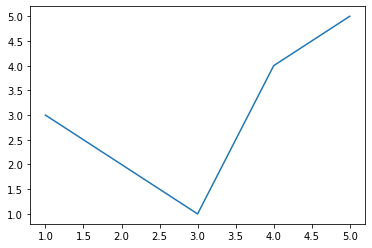

In [22]:
fig = plt.figure()

# add a subplot to the figure (the explicit way)
# Passing the numbers is optional and you can pass 111 but I will stick with this way. 
# That's why I call it explicit way.
# 1, 1, 1 means: 1 axes in a ]1 row 1 column grid. More on this later.
ax1 = fig.add_subplot(1, 1, 1)

# some data
x = [1, 2, 3, 4, 5]
y = [3, 2, 1, 4, 5]

# plot basic things
ax1.plot(x, y)


#### fig.subplots()

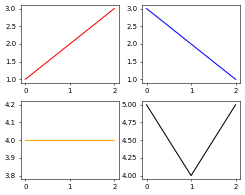

In [4]:
fig = plt.figure(figsize=(5,4), dpi=50)
# create a 4 plots and use tuple unpacking to name everyplot
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
ax1.plot([1,2,3], color = "red")
ax2.plot([3,2,1], color = "blue")
ax3.plot([4,4,4], color = "orange")
ax4.plot([5,4,5], color = "black")
plt.tight_layout()

#### subplots() + for loop()

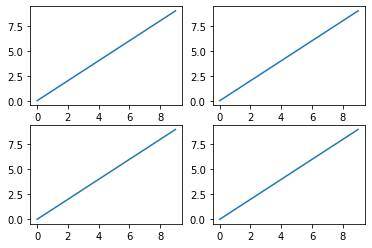

In [5]:
# you can do the same using a for loop
nrows = 2
ncolumns = 2
fig, axes = plt.subplots(nrows, ncolumns)

# axes is just a tuple as we saw before
# since se specified 
for row in range(nrows):
    for column in range(ncolumns):
        ax = axes[row, column]
        ax.plot(np.arange(10))

### add_gridspec()  

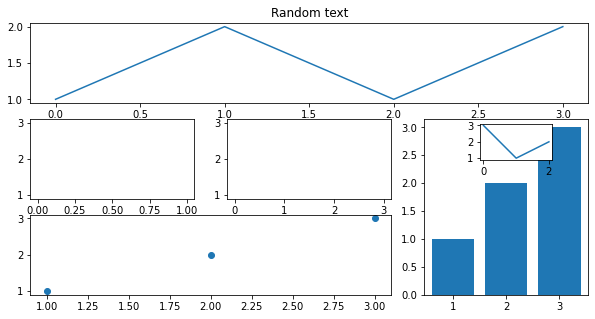

In [6]:
fig = plt.figure(figsize = (10, 5))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot([1,2,1,2])
ax1.set_title("Random text")
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(1,3,1)
ax3 = fig.add_subplot(gs[1,1])
ax3.plot(3,1,3)
ax4 = fig.add_subplot(gs[2,:-1])
ax4.scatter([1,2,3], [1,2,3])
ax5 = fig.add_subplot(gs[1:, -1])
ax5.bar([1,2,3], [1,2,3])
ax5_bis = fig.add_axes([0.75, 0.5, 0.1, 0.1])
ax5_bis.plot([3,1,2])

---

## Parte II: Tipos de Gráficos 

```python
plt.plot() #line plot
plt.bar() # x discreta, y específicamos
plt.scatter()
plt.hist() #x continua
```


---

## Parte III: Extras  

#### Posibles Extras en todos los gráficos:
Ref: 
```python
ax.plot(data, marker='o', cmap='' , label='' , linewidth=2, edgecolors='white', linewidths=2, alpha=0.7, color=, width=0.6, markersize=float)
```


#### Colors & Markres

```python
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]
color = '#eeefff' # Código RGB
colors = [ b: blue, g: green, r: red, c: cyan, m: magenta, y: yellow, k: black, w: white]
linestyle or ls	[ '-' | '--' | '-.' | ':' | 'steps' | ...]
```




#### Ajustes a los Axes

```python
axs[0].set_xlim(0, 2)
axs[0].set_ylim(0, 2)
axs[0].xticks([0, 1, 2], ['January', 'February', 'March'],fontsize=7, fontfamily='serif')
axs[0].yticks([0, 1, 2], ['January', 'February', 'March'],fontsize=7, fontfamily='serif')
axs[0].set_xlabel('time')
axs[0].set_ylabel('label Y')
```

#### Ajustes Generales
```python
plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold')
plt.tight_layout()
```


```python

```

```python

```

#### Paletas de Color (para cmap)

Referencia : https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips

- diverging
- qualitative (para categorías)
- sequential
- scientific

In [9]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

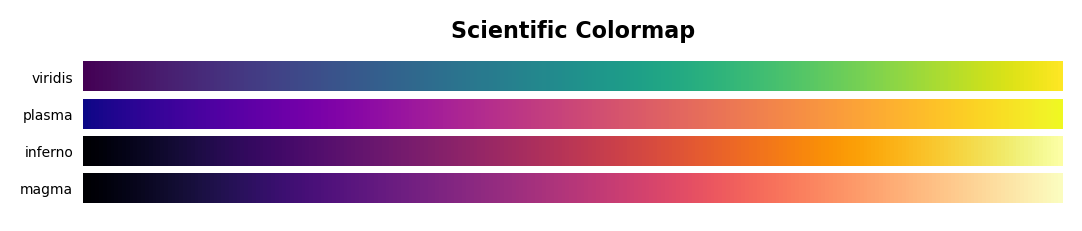

In [10]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

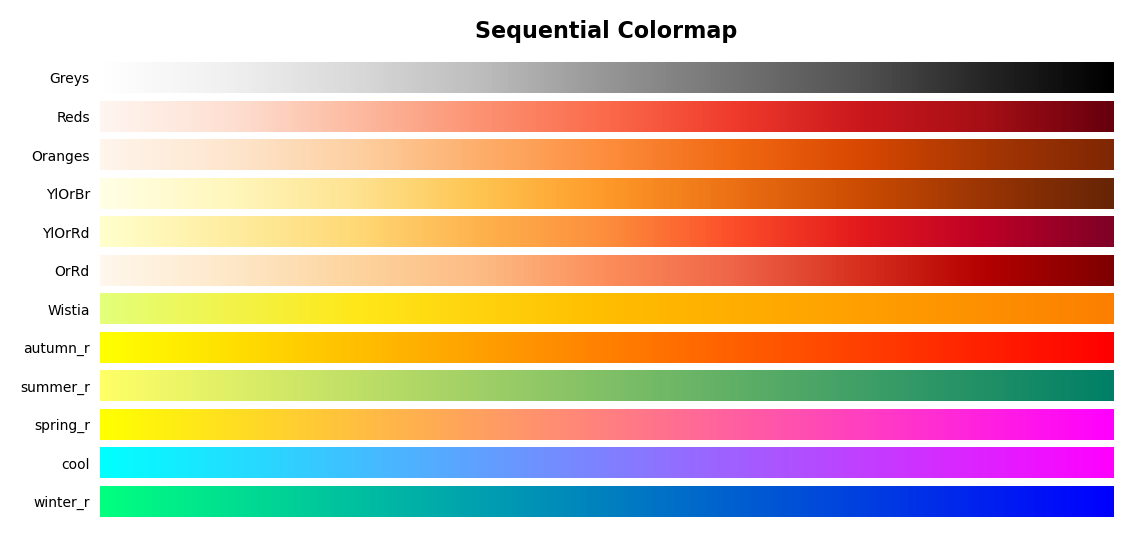

In [11]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

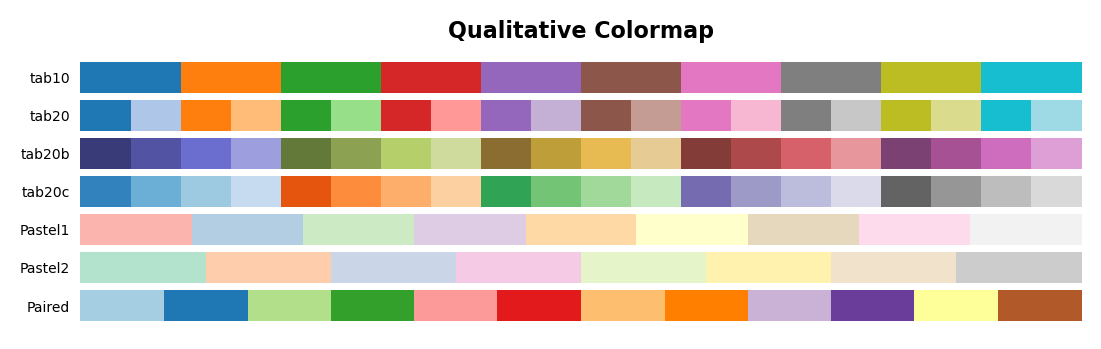

In [12]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired' )

cmap_plot(qualitative_cmap, 'Qualitative')

---

## Parte IV: Galería 

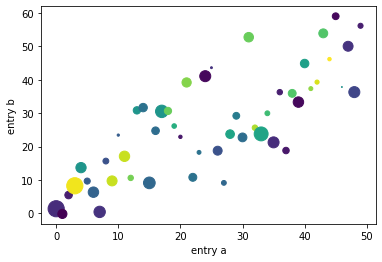

In [23]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### Gráfico Divertido

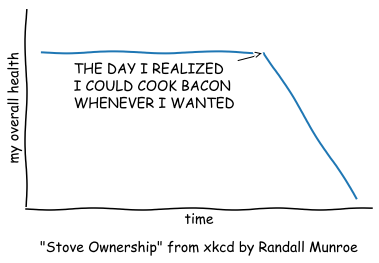

In [7]:
import matplotlib
matplotlib.font_manager._rebuild()
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(10, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')